In [1]:
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [2]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [3]:
import pandas_profiling

In [4]:
matches_profile = matches.profile_report(title='IPL Data Profiling before EDA', progress_bar=False, minimal=True)

matches_profile.to_file(output_file = 'matches_profiling_before_processing.html')

In [5]:
deliveries_profile = deliveries.profile_report(title='IPL Data Profiling bedore Processing', progress_bar=False, minimal=True)

deliveries_profile.to_file(output_file='deliveries_profiling_before_processing.html')

In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               696 non-null    int64 
 1   season           696 non-null    int64 
 2   city             689 non-null    object
 3   date             696 non-null    object
 4   team1            696 non-null    object
 5   team2            696 non-null    object
 6   toss_winner      696 non-null    object
 7   toss_decision    696 non-null    object
 8   result           696 non-null    object
 9   dl_applied       696 non-null    int64 
 10  winner           693 non-null    object
 11  win_by_runs      696 non-null    int64 
 12  win_by_wickets   696 non-null    int64 
 13  player_of_match  693 non-null    object
 14  venue            696 non-null    object
 15  umpire1          695 non-null    object
 16  umpire2          695 non-null    object
 17  umpire3          60 non-null     ob

In [7]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
#Dropping date, unpire1, umpire2 & umpire3 columns as they are not relevant
matches.drop(['date', 'umpire1', 'umpire2', 'umpire3'], axis=1, inplace=True)

matches.set_index('id', inplace=True)

In [9]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164750 entries, 0 to 164749
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          164750 non-null  int64 
 1   inning            164750 non-null  int64 
 2   batting_team      164750 non-null  object
 3   bowling_team      164750 non-null  object
 4   over              164750 non-null  int64 
 5   ball              164750 non-null  int64 
 6   batsman           164750 non-null  object
 7   non_striker       164750 non-null  object
 8   bowler            164750 non-null  object
 9   is_super_over     164750 non-null  int64 
 10  wide_runs         164750 non-null  int64 
 11  bye_runs          164750 non-null  int64 
 12  legbye_runs       164750 non-null  int64 
 13  noball_runs       164750 non-null  int64 
 14  penalty_runs      164750 non-null  int64 
 15  batsman_runs      164750 non-null  int64 
 16  extra_runs        164750 non-null  int

In [10]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [11]:
deliveries.set_index('match_id', inplace=True)

In [12]:
## Data Cleaning

In [13]:
#Replacing the full names by short names

matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [14]:
# Replacing the full names by short names

deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [15]:
deliveries_season = deliveries.merge(matches['season'], left_on=deliveries.index, right_on=matches.index)

In [16]:
#Exploratory Data Analysis

In [17]:
matches['season'].nunique()

11

In [18]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018],
      dtype=int64)

In [19]:
seasons = matches['season'].value_counts().to_frame()
seasons

,season
2013,76
2012,74
2011,73
2010,60
2014,60
2016,60
2018,60
2015,59
2017,59
2008,58


<AxesSubplot:title={'center':'Number of matches in a season'}>

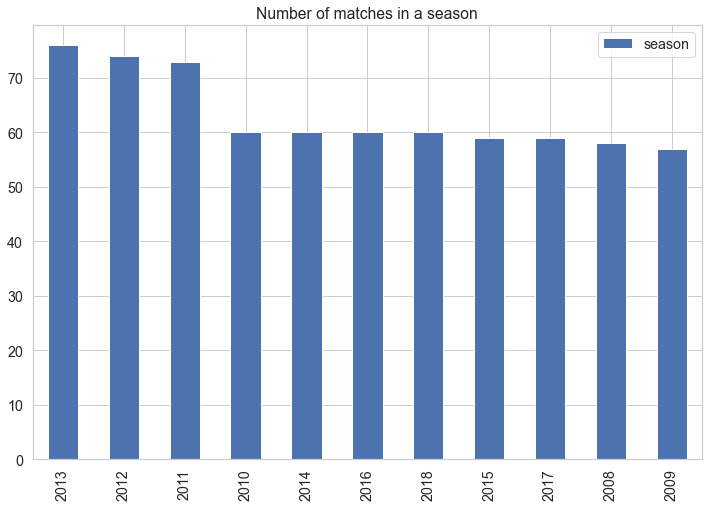

In [20]:
seasons.plot(kind='bar', title='Number of matches in a season', figsize=(12,8))

In [21]:
no_of_matches = matches['venue'].value_counts().to_frame()
no_of_matches.rename(columns={'venue': 'no_of_matches'}, inplace=True)
no_of_matches

,no_of_matches
M Chinnaswamy Stadium,73
Eden Gardens,70
Feroz Shah Kotla,67
Wankhede Stadium,66
"Rajiv Gandhi International Stadium, Uppal",56
"MA Chidambaram Stadium, Chepauk",49
Sawai Mansingh Stadium,40
"Punjab Cricket Association Stadium, Mohali",35
Maharashtra Cricket Association Stadium,21
Dr DY Patil Sports Academy,17


In [22]:
overall_team_stats = pd.DataFrame({'Total Matches Played': matches['team1'].value_counts() +  matches['team2'].value_counts(),
                                    'Toss Won': matches['toss_winner'].value_counts(), 
                                    'Total Won': matches['winner'].value_counts(), 
                                    'Total Lost': ((matches['team1'].value_counts() + matches['team2'].value_counts()) - matches['winner'].value_counts())
                                })

overall_team_stats.sort_values(by='Total Won', ascending=False)

,Total Matches Played,Toss Won,Total Won,Total Lost
MI,171,90,98,73
CSK,147,77,90,57
KKR,164,87,86,78
RCB,166,77,79,87
KXIP,162,75,76,86
RR,133,69,70,63
DD,161,80,67,94
SRH,93,42,52,41
DC,75,43,29,46
RPS,30,13,15,15


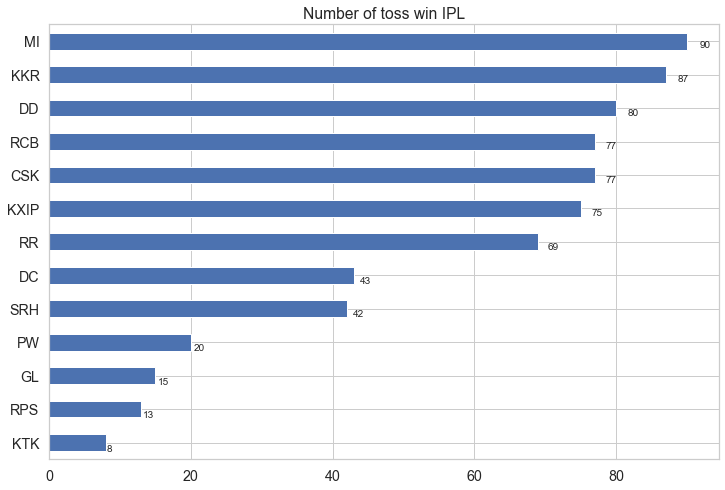

In [23]:
ax = overall_team_stats['Toss Won'].sort_values().plot(kind='barh', title='Number of toss win IPL', figsize=(12,8))
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.020, p.get_y() * 1.005))

In [24]:
season_winner = matches.drop_duplicates(subset=['season'], keep='last') [['season', 'winner']]

season_winner.sort_values(by='season').reset_index(drop=True)

,season,winner
0,2008,RR
1,2009,DC
2,2010,CSK
3,2011,CSK
4,2012,KKR
5,2013,MI
6,2014,KKR
7,2015,MI
8,2016,SRH
9,2017,MI


In [25]:
overall_team_stats['Win Ratio'] = overall_team_stats['Total Won'] * 100 / overall_team_stats['Total Matches Played']

overall_team_stats['Loss Ratio'] = overall_team_stats['Total Lost'] * 100 / overall_team_stats['Total Matches Played']

overall_team_stats.round(2).sort_values(by='Win Ratio', ascending=False)

,Total Matches Played,Toss Won,Total Won,Total Lost,Win Ratio,Loss Ratio
CSK,147,77,90,57,61.22,38.78
MI,171,90,98,73,57.31,42.69
SRH,93,42,52,41,55.91,44.09
RR,133,69,70,63,52.63,47.37
KKR,164,87,86,78,52.44,47.56
RPS,30,13,15,15,50.00,50.00
RCB,166,77,79,87,47.59,52.41
KXIP,162,75,76,86,46.91,53.09
GL,30,15,13,17,43.33,56.67
KTK,14,8,6,8,42.86,57.14


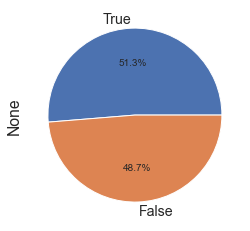

In [26]:
wins = matches['toss_winner'] == matches['winner']
ax = wins.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [27]:
toss_winner_as_winner = matches[matches['winner'] == matches['toss_winner']].groupby(['toss_winner'])['winner'].count()

In [28]:
total_toss_winner = matches.groupby(['toss_winner'])['winner'].count()

In [29]:
win_per_on_toss_win = toss_winner_as_winner / total_toss_winner * 100

In [30]:
win_per_on_toss_win = win_per_on_toss_win.to_frame()

In [31]:
win_per_on_toss_win['lost_per_on_toss_win'] = 100 - win_per_on_toss_win['winner']

In [32]:
win_per_on_toss_win.rename(columns={'winner': 'win_per_on_toss_win'}, inplace=True)

In [33]:
win_per_on_toss_win.round(2).sort_values(by= 'win_per_on_toss_win', ascending=False)

,win_per_on_toss_win,lost_per_on_toss_win
toss_winner,,
GL,66.67,33.33
CSK,64.94,35.06
RPS,61.54,38.46
KKR,56.32,43.68
MI,55.56,44.44
RR,54.41,45.59
RCB,51.32,48.68
KTK,50.00,50.00
SRH,50.00,50.00


<AxesSubplot:title={'center':'Match Winning/Losing % of a team on winning the toss'}, xlabel='toss_winner'>

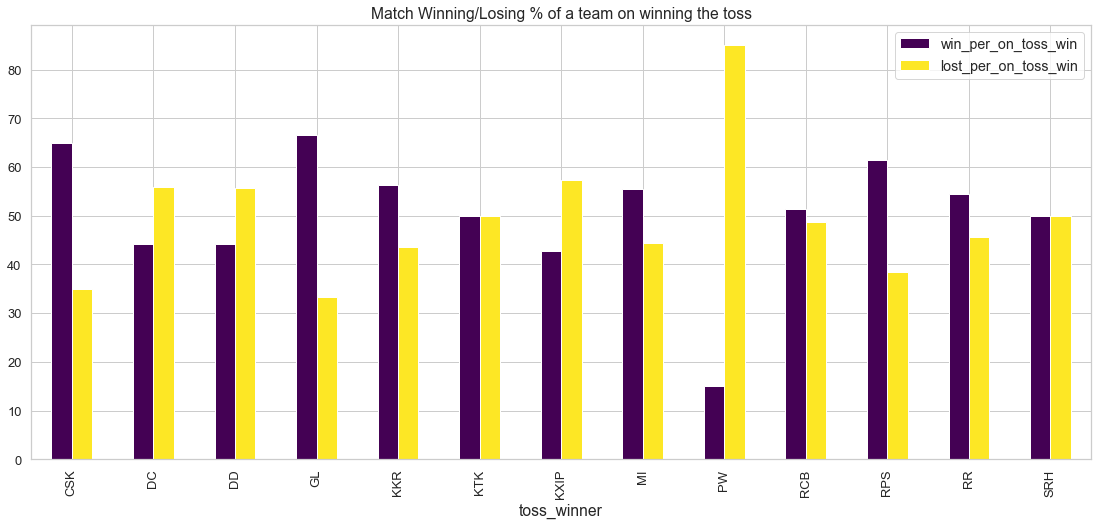

In [34]:
win_per_on_toss_win.plot.bar(figsize=(19,8), title= 'Match Winning/Losing % of a team on winning the toss',fontsize=13,
 cmap='viridis')

In [35]:
stats.mode(matches['venue'][matches['win_by_runs'] != 0])

ModeResult(mode=array(['Feroz Shah Kotla'], dtype=object), count=array([33]))

In [36]:
stats.mode(matches['venue'][matches['win_by_wickets'] != 0])

ModeResult(mode=array(['Eden Gardens'], dtype=object), count=array([41]))

In [37]:
atleast_10_match_at_venue = matches['venue'].value_counts().to_frame()

In [38]:
atleast_10_match_at_venue = atleast_10_match_at_venue[atleast_10_match_at_venue['venue']>=10]['venue'].to_frame()

In [39]:
atleast_10_match_at_venue.rename(columns={'venue':'no_of_matches'}, inplace=True)

In [40]:
atleast_10_match_at_venue

,no_of_matches
M Chinnaswamy Stadium,73
Eden Gardens,70
Feroz Shah Kotla,67
Wankhede Stadium,66
"Rajiv Gandhi International Stadium, Uppal",56
"MA Chidambaram Stadium, Chepauk",49
Sawai Mansingh Stadium,40
"Punjab Cricket Association Stadium, Mohali",35
Maharashtra Cricket Association Stadium,21
Dr DY Patil Sports Academy,17


In [41]:
matches1 = matches[matches['venue'].isin(atleast_10_match_at_venue.index)]

In [42]:
matches1[matches1['win_by_runs'] > 0]['venue'].value_counts()

Feroz Shah Kotla                                        33
Wankhede Stadium                                        33
MA Chidambaram Stadium, Chepauk                         30
M Chinnaswamy Stadium                                   30
Eden Gardens                                            29
Rajiv Gandhi International Stadium, Uppal               23
Punjab Cricket Association Stadium, Mohali              15
Sawai Mansingh Stadium                                  14
Subrata Roy Sahara Stadium                              11
Kingsmead                                                9
Maharashtra Cricket Association Stadium                  7
Punjab Cricket Association IS Bindra Stadium, Mohali     7
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium      7
Dr DY Patil Sports Academy                               7
Sardar Patel Stadium, Motera                             6
Brabourne Stadium                                        6
SuperSport Park                                         

In [43]:
win_by_runs = matches1[matches1['win_by_runs'] > 0]['venue'].value_counts()*100 / matches1['venue'].value_counts()


In [44]:
win_by_runs = win_by_runs.sort_values(ascending=False).head(5).to_frame()

In [45]:
win_by_runs.rename(columns = {'venue': 'winning_percentage'}, inplace=True)

In [46]:
win_by_runs

,winning_percentage
Subrata Roy Sahara Stadium,64.705882
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,63.636364
"MA Chidambaram Stadium, Chepauk",61.224490
Kingsmead,60.000000
Brabourne Stadium,54.545455


In [47]:
matches2 = matches[matches['venue'].isin(atleast_10_match_at_venue.index)]

In [48]:
win_by_wickets = matches1[matches['win_by_wickets'] > 0]['venue'].value_counts()*100 / matches1['venue'].value_counts()

<ipython-input-48-80bc9eaf6996>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  win_by_wickets = matches1[matches['win_by_wickets'] > 0]['venue'].value_counts()*100 / matches1['venue'].value_counts()


In [49]:
win_by_wickets = win_by_wickets.sort_values(ascending=False).head(5).to_frame()

In [50]:
win_by_wickets.rename(columns={'venue':'winning_percentage'}, inplace=True)

In [51]:
win_by_wickets

,winning_percentage
SuperSport Park,66.666667
Maharashtra Cricket Association Stadium,66.666667
Sawai Mansingh Stadium,65.000000
Saurashtra Cricket Association Stadium,60.000000
Dr DY Patil Sports Academy,58.823529


In [52]:
matches['winner'][matches['win_by_wickets'] != 0].mode()

0    KKR
dtype: object

In [53]:
wins = matches['toss_decision'][matches['toss_winner'] == matches['winner']]

<AxesSubplot:ylabel='toss_decision'>

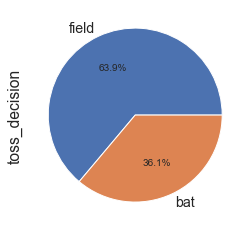

In [54]:
wins.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [55]:
no_of_wins = matches[matches['winner'] == 'SRH'].groupby(['season']).count()

<AxesSubplot:title={'center':'Sunrisers Hyderabad Wins per season'}, xlabel='season'>

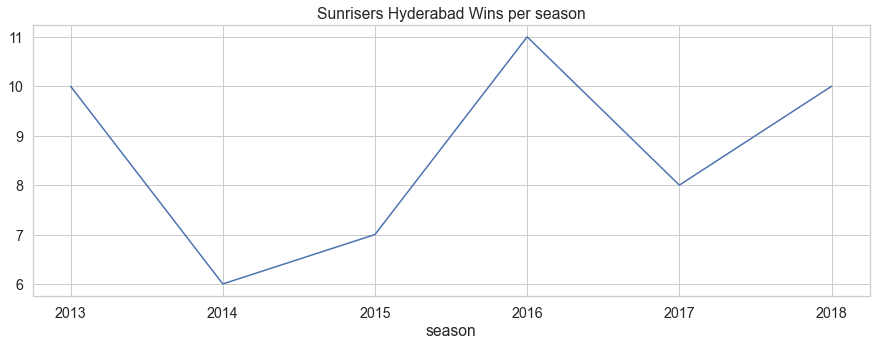

In [56]:
no_of_wins['winner'].plot(kind='line', figsize=(15,5), title='Sunrisers Hyderabad Wins per season')

In [57]:
matches['venue'][matches['toss_winner'] == 'SRH'][matches['winner'] == 'SRH'].mode()

0    Rajiv Gandhi International Stadium, Uppal
dtype: object

In [58]:
srh_matches = matches[(matches['team1'] == 'SRH') | (matches['team2'] == 'SRH')]

In [59]:
srh_total_matches = srh_matches['venue'].value_counts().to_frame()

In [60]:
srh_total_matches.rename(columns={'venue': 'NO_OF_MATCHES_AT_VENUE'}, inplace=True)

In [61]:
win_by_runs = srh_matches[(srh_matches['winner'] == 'SRH') & (srh_matches['win_by_runs'] > 0)]

In [62]:
win_by_runs_count = win_by_runs['venue'].value_counts().to_frame()

In [63]:
win_by_runs_count.rename(columns={'venue': 'SRH_WINS_BY_RUNS'}, inplace=True)

In [64]:
win_by_wickets = srh_matches[(srh_matches['winner'] == 'SRH') & (srh_matches['win_by_wickets'] > 0)]

In [65]:
win_by_wickets_count = win_by_wickets['venue'].value_counts().to_frame()

In [66]:
win_by_wickets_count.rename(columns={'venue': 'SRH_WINS_BY_WICKETS'}, inplace=True)

In [67]:
frames = [srh_total_matches, win_by_runs_count, win_by_wickets_count]

In [68]:
result = pd.concat(frames, axis=1)

In [69]:
result

,NO_OF_MATCHES_AT_VENUE,SRH_WINS_BY_RUNS,SRH_WINS_BY_WICKETS
"Rajiv Gandhi International Stadium, Uppal",37,11.0,13.0
Feroz Shah Kotla,7,1.0,4.0
M Chinnaswamy Stadium,7,1.0,1.0
Eden Gardens,7,1.0,1.0
Wankhede Stadium,6,1.0,NaN
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,5,3.0,NaN
"Punjab Cricket Association IS Bindra Stadium, Mohali",3,1.0,1.0
"MA Chidambaram Stadium, Chepauk",2,NaN,NaN
Shaheed Veer Narayan Singh International Stadium,2,1.0,NaN
Sawai Mansingh Stadium,2,1.0,NaN


<AxesSubplot:title={'center':'Win by Rum/Wicket Percentage for SRH at each stadium'}>

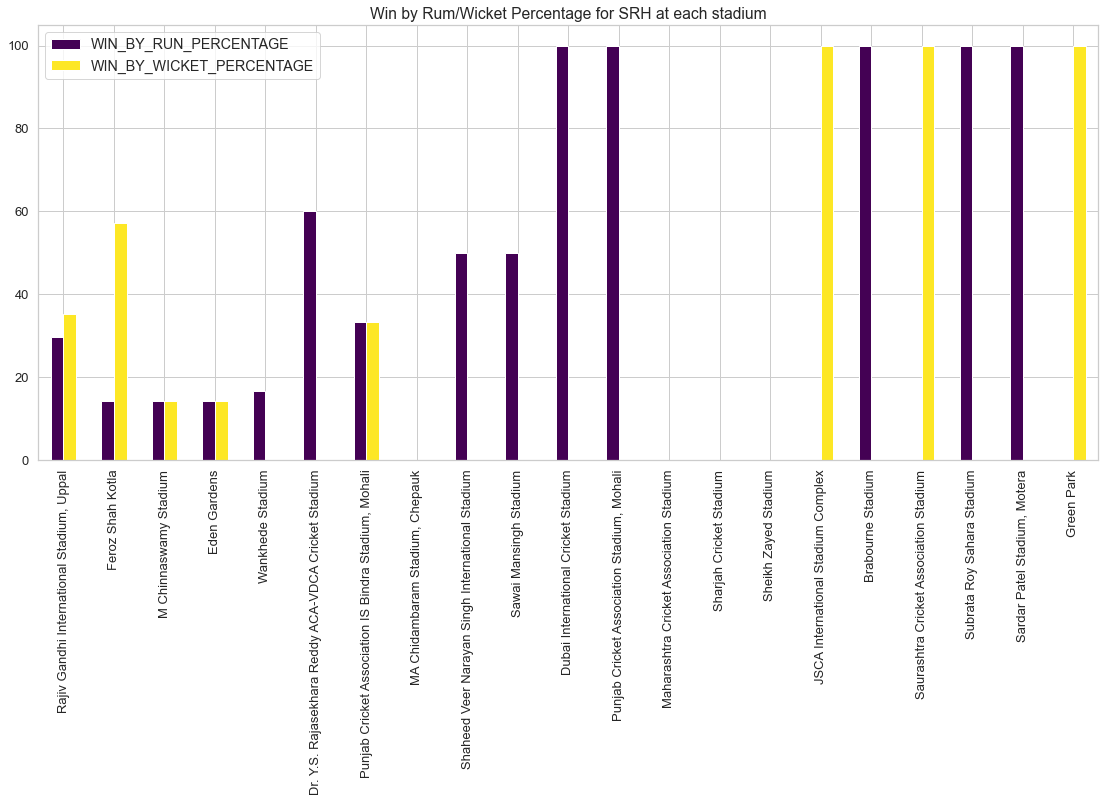

In [70]:
result["SRH_NO_OF_LOSS"] =  result["NO_OF_MATCHES_AT_VENUE"]  - result["SRH_WINS_BY_RUNS"] - result["SRH_WINS_BY_WICKETS"];
result["WIN_BY_RUN_PERCENTAGE"] = result["SRH_WINS_BY_RUNS"] * 100 / result["NO_OF_MATCHES_AT_VENUE"]
result["WIN_BY_WICKET_PERCENTAGE"] = result["SRH_WINS_BY_WICKETS"] * 100 / result["NO_OF_MATCHES_AT_VENUE"]
result[["WIN_BY_RUN_PERCENTAGE", "WIN_BY_WICKET_PERCENTAGE"]].plot.bar(figsize=(19,8), title="Win by Rum/Wicket Percentage for SRH at each stadium",fontsize=13, cmap='viridis')

<AxesSubplot:title={'center':'Wind by run/wicket and losses for SRH at Rajiv Gandhi'}, ylabel='Rajiv Gandhi International Stadium, Uppal'>

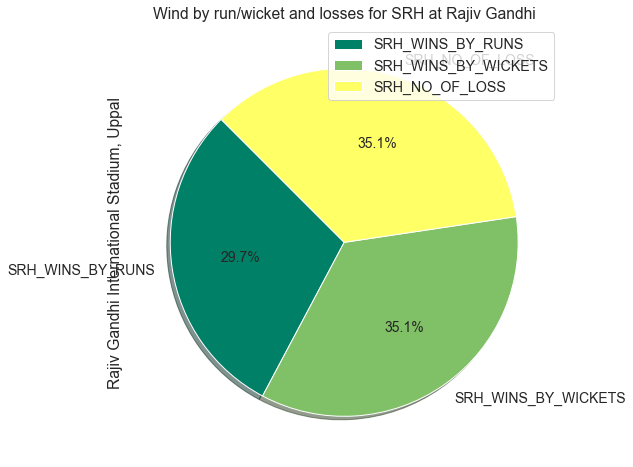

In [72]:
 result.iloc[0,1:4].plot(kind='pie', fontsize=14, autopct='%3.1f%%', title='Wind by run/wicket and losses for SRH at Rajiv Gandhi', figsize = (10,8), shadow=True, startangle=135, legend=True, cmap='summer')

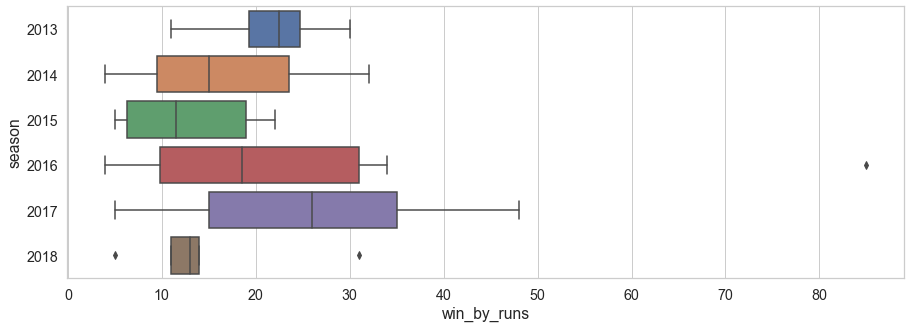

In [73]:
plt.figure(figsize=(15,5))

sns.boxplot(y='season', x='win_by_runs', data=matches[(matches['win_by_runs']>0) & (matches['team1'] == 'SRH')], orient = 'h')
plt.show()

<AxesSubplot:xlabel='win_by_wickets', ylabel='season'>

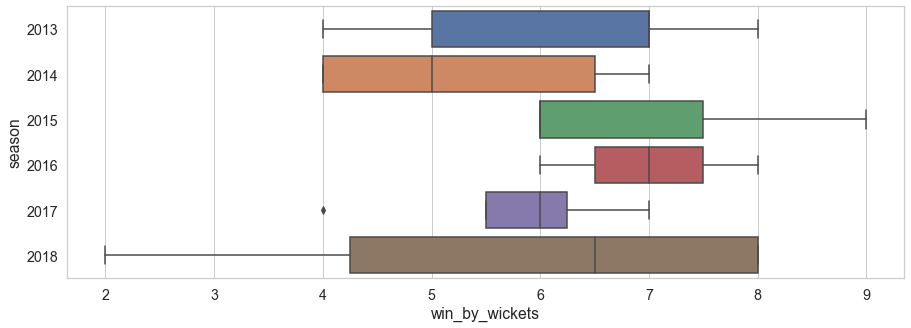

In [74]:
plt.figure(figsize=(15,5))

sns.boxplot(y='season', x='win_by_wickets', data=matches[(matches['win_by_wickets']>0) & (matches['team1'] == 'SRH')], orient = 'h')

In [75]:
srh_defeats = srh_matches[srh_matches['winner'] != 'SRH']['winner'].value_counts().to_frame()
srh_defeats.rename(columns={'winner':'number_of_defeats'},inplace=True)
srh_defeats

,number_of_defeats
KKR,9
CSK,8
MI,5
RCB,5
DD,4
RR,4
RPS,3
KXIP,3


In [76]:
csk_kkr = ['CSK', 'KKR']
srh_csk_kkr_matches = srh_matches[(srh_matches['winner'] != 'SRH') & (srh_matches['team1'].isin(csk_kkr) | srh_matches['team2'].isin(csk_kkr))]

In [81]:
srh_csk_kkr_matches['opted_for'] = srh_csk_kkr_matches['win_by_runs'].apply(lambda x: 'BAT' if (x>0) else 'FIELD')
plt.figure(figsize=(15,5))

<ipython-input-81-dd42ff5d5d9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  srh_csk_kkr_matches['opted_for'] = srh_csk_kkr_matches['win_by_runs'].apply(lambda x: 'BAT' if (x>0) else 'FIELD')


<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

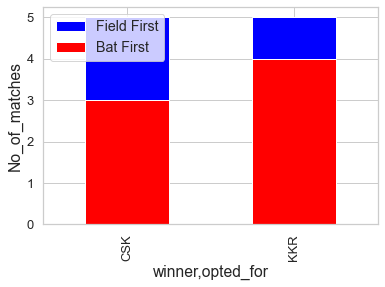

In [80]:
srh_csk_kkr_matches[srh_csk_kkr_matches['opted_for'] == 'FIELD'].groupby(['winner'])['opted_for'].value_counts().plot(kind='bar',color='blue')

srh_csk_kkr_matches[srh_csk_kkr_matches['opted_for'] == 'BAT'].groupby(['winner'])['opted_for'].value_counts().plot(kind='bar',color='red', fontsize=13)

plt.ylabel('No_of_matches')
plt.xticks([0,1], ['CSK', 'KKR'])
plt.legend(['Field First', 'Bat First'])
plt.show()

In [83]:
no_of_deliveries_per_bowler = deliveries[deliveries['bowling_team'] == 'SRH'].groupby('bowler')['bowler'].count().to_frame()

In [84]:
no_of_deliveries_per_bowler.rename(columns={'bowler': 'no_of_deliveries'}, inplace=True)

In [85]:
no_of_deliveries_per_bowler_atleast24 = no_of_deliveries_per_bowler[no_of_deliveries_per_bowler['no_of_deliveries'] > 24]

In [86]:
total_extra_runs = deliveries[deliveries['bowling_team'] == 'SRH'].groupby('bowler')['extra_runs'].sum().to_frame()

In [87]:
total_extra_runs.rename(columns={'extra_runs': 'no_of_deliveries'}, inplace=True)

In [88]:
perc = total_extra_runs * 100 / no_of_deliveries_per_bowler_atleast24

<AxesSubplot:title={'center':'% of extra runs over deliveries bowled'}, xlabel='bowler'>

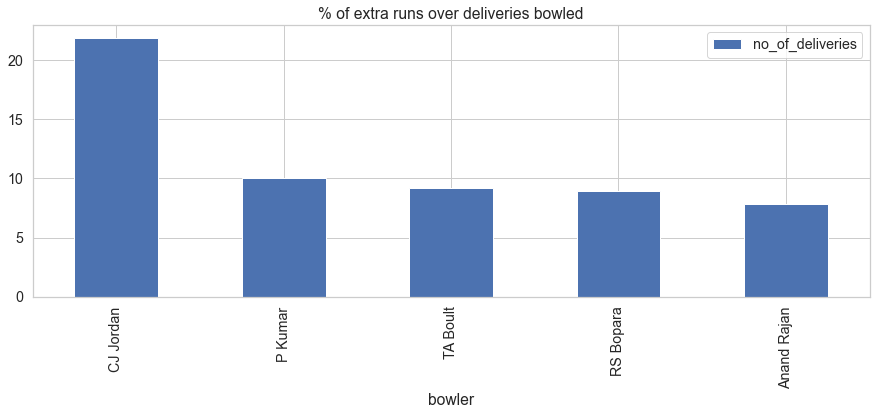

In [89]:
perc.sort_values(by='no_of_deliveries', ascending=False).head(5).plot(kind='bar', figsize=(15, 5), title='% of extra runs over deliveries bowled')

In [91]:
runs_per_team = deliveries_season[(deliveries_season["over"] <= 6)].groupby(deliveries_season["batting_team"])['total_runs'].sum()

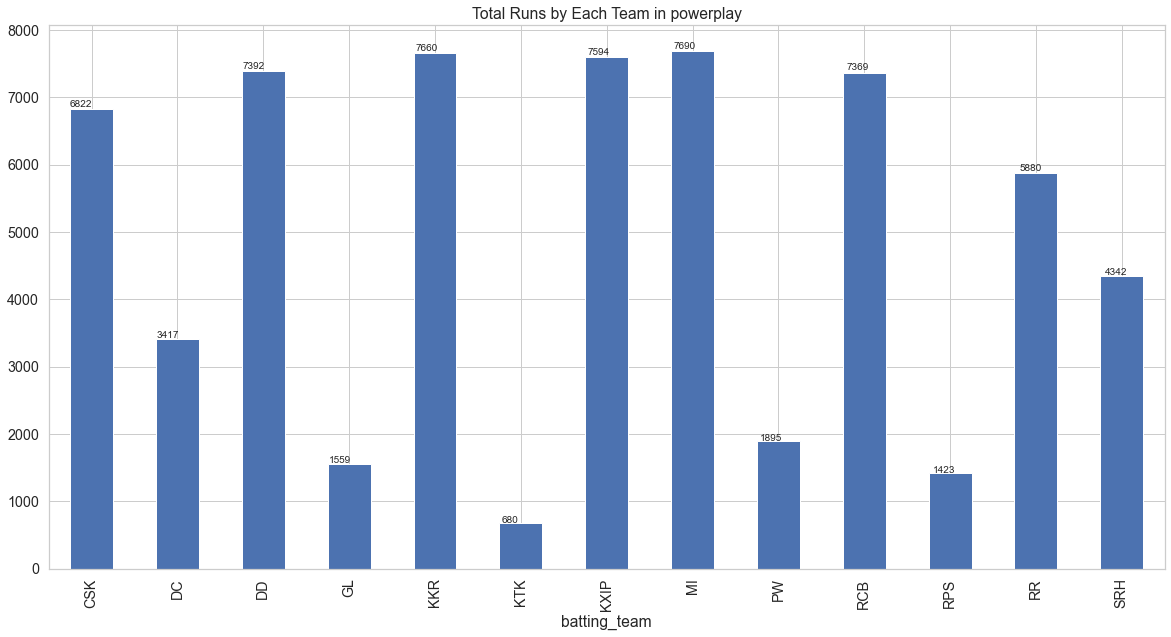

In [92]:
ax = runs_per_team.plot(kind='bar', figsize=(20,10), title='Total Runs by Each Team in powerplay')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [95]:
wick_in_powerplay_per_match_per_season = deliveries_season[(deliveries_season['over'] <= 6) & (deliveries_season['player_dismissed'].notnull())].groupby(deliveries_season['bowling_team'])['player_dismissed'].count()

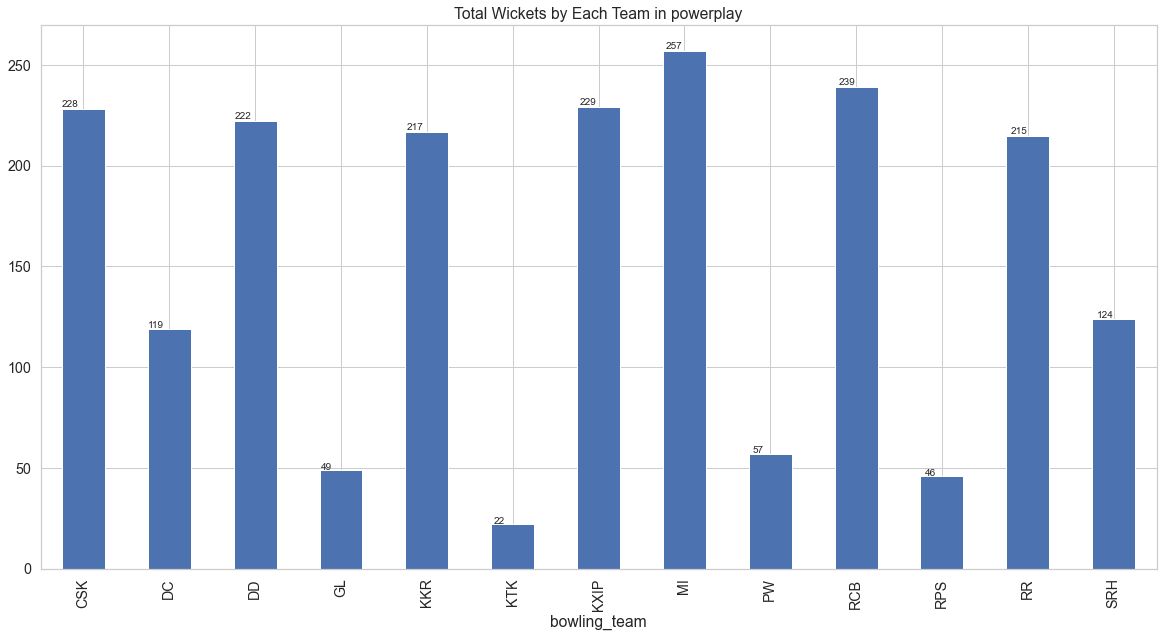

In [98]:
ax = wick_in_powerplay_per_match_per_season.plot(kind='bar', figsize=(20,10), title='Total Wickets by Each Team in powerplay')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

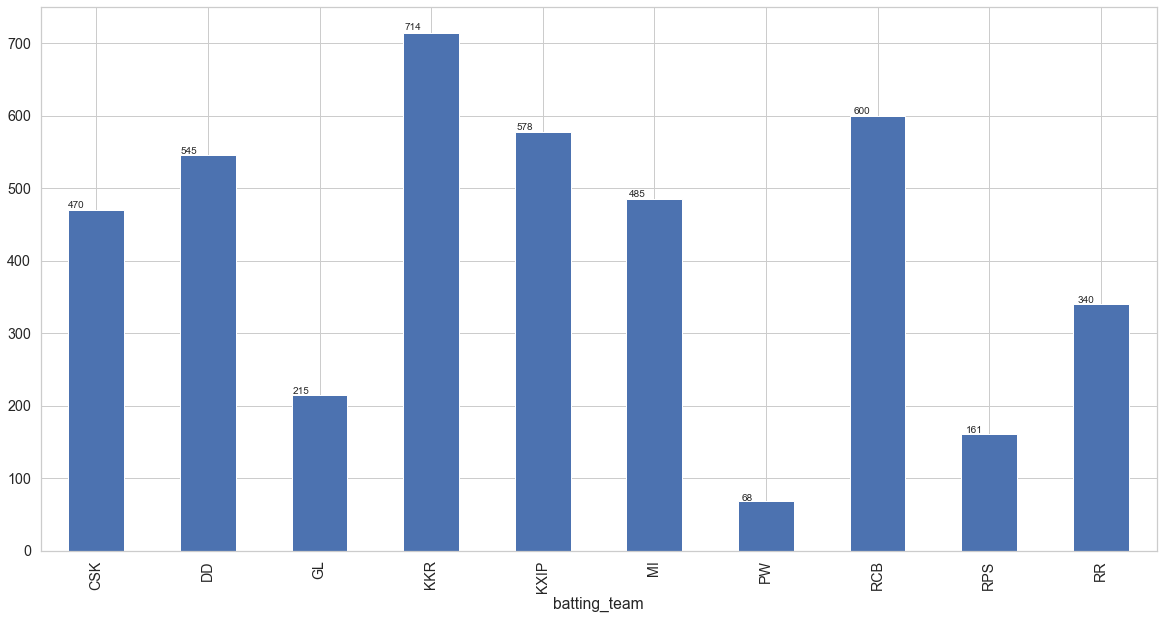

In [100]:
runs_per_team = deliveries_season[(deliveries_season['over'] <= 6) & (deliveries_season['bowling_team'] == 'SRH')].groupby(deliveries_season['batting_team'])['total_runs'].sum()
ax = runs_per_team.plot(kind='bar', figsize=(20,10))
for p in ax.patches:
     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

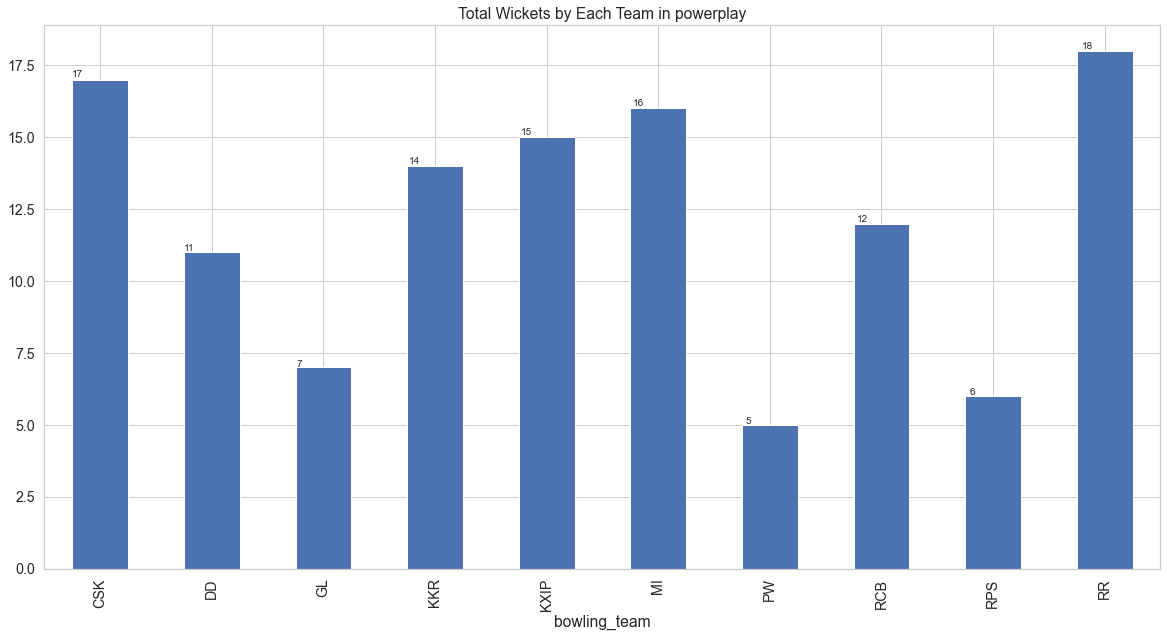

In [101]:
wick_in_powerplay_per_match_per_season = deliveries_season[(deliveries_season['batting_team'] == 'SRH') & (deliveries_season['over'] <= 6) & (deliveries_season['player_dismissed'].notnull())].groupby(deliveries_season['bowling_team'])['player_dismissed'].count()
ax = wick_in_powerplay_per_match_per_season.plot(kind='bar', figsize=(20,10), title='Total Wickets by Each Team in powerplay')
for p in ax.patches:
     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

<IPython.core.display.Javascript object>

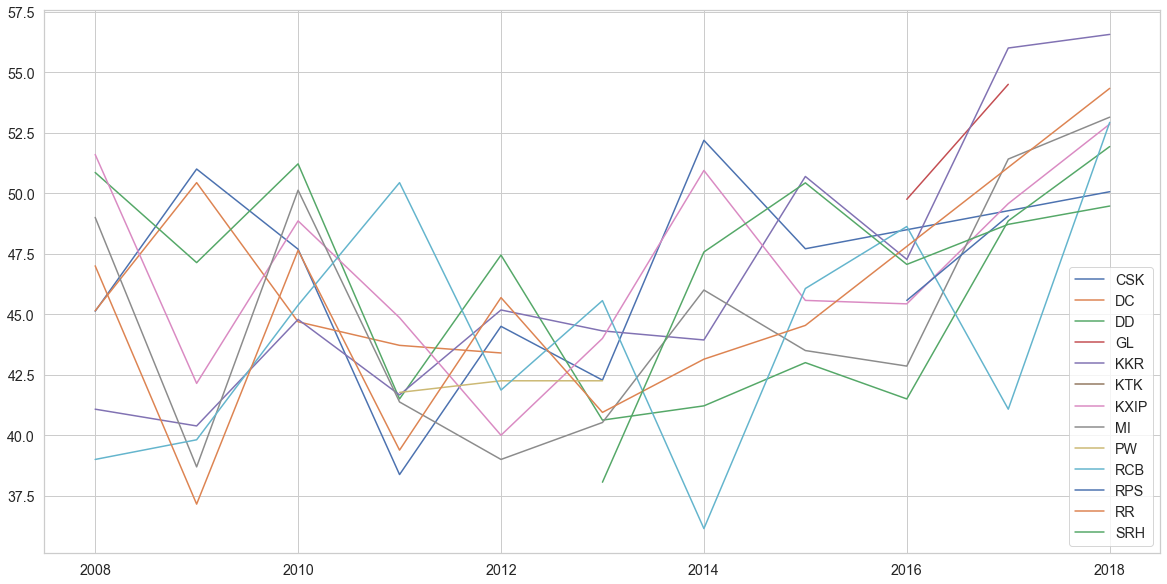

In [104]:
teams = np.sort(matches['team1'].unique())
plt.figure(figsize=(20,10))
for key, team in enumerate(teams): 
    run_in_powerplay_per_match_per_season = deliveries_season[(deliveries_season['batting_team'] == team) & (deliveries_season['over'] <= 6)].groupby(['key_0', 'season'])['total_runs'].sum().to_frame() 
    a = run_in_powerplay_per_match_per_season.groupby(['season'])['total_runs'].mean() 
    plt.plot(list(a.index), a, label = team)
 
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

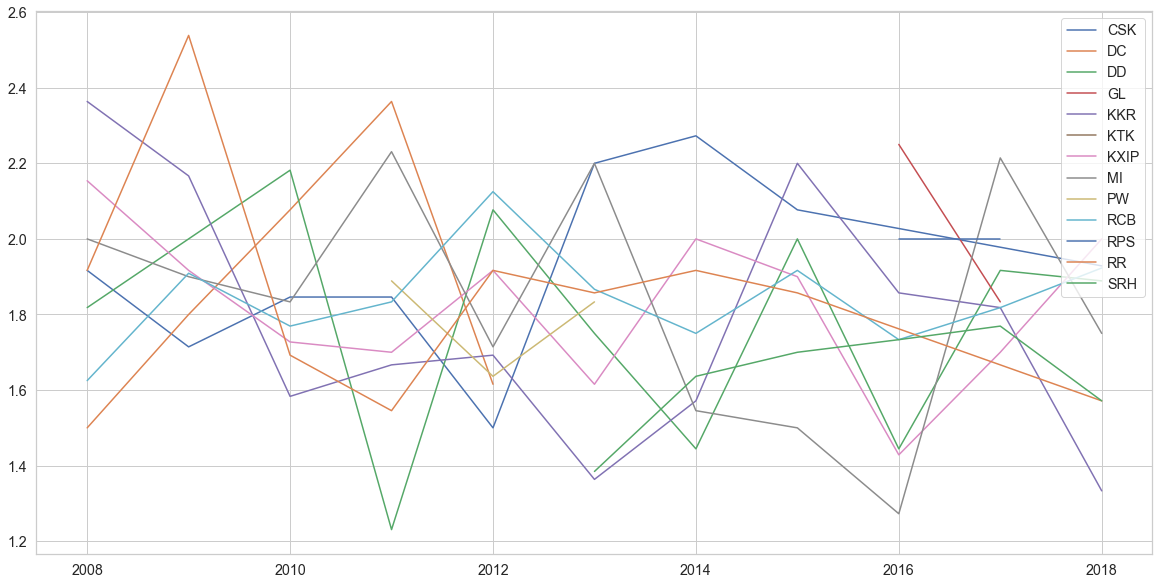

In [106]:
teams = np.sort(matches['team1'].unique())
plt.figure(figsize=(20,10))
for key, team in enumerate(teams): 
    wick_in_powerplay_per_match_per_season = deliveries_season[(deliveries_season['bowling_team'] == team) & (deliveries_season['over'] <= 6) & (deliveries_season['player_dismissed'].notnull())].groupby(['key_0', 'season'])['season'].count() 
    a = wick_in_powerplay_per_match_per_season.groupby(['season']).mean() 
    plt.plot(list(a.index), a, label = team)
 
plt.legend()
plt.show()

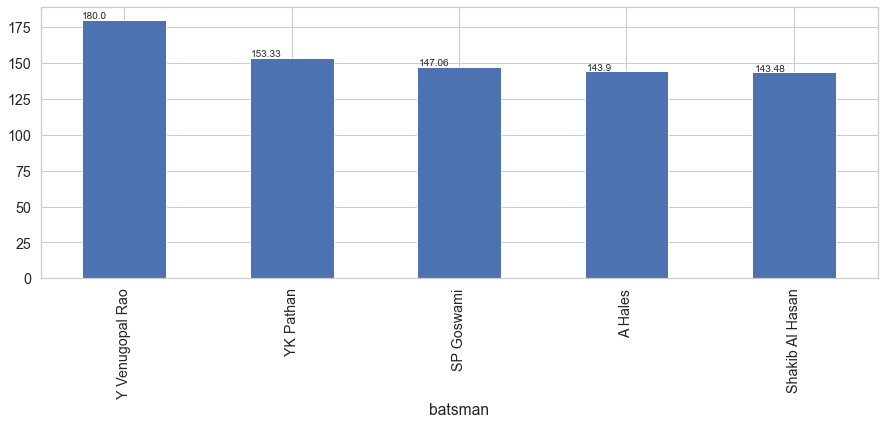

In [108]:
srh_batsman = deliveries_season[(deliveries_season['batting_team'] == "SRH") & (deliveries_season['over'] <= 6)]
batsman_mean = (srh_batsman.groupby('batsman')['batsman_runs'].mean() * 100).round(2)
ax = batsman_mean.sort_values(ascending = False).head(5).plot(kind='bar', figsize=(15,5))
for p in ax.patches:
     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

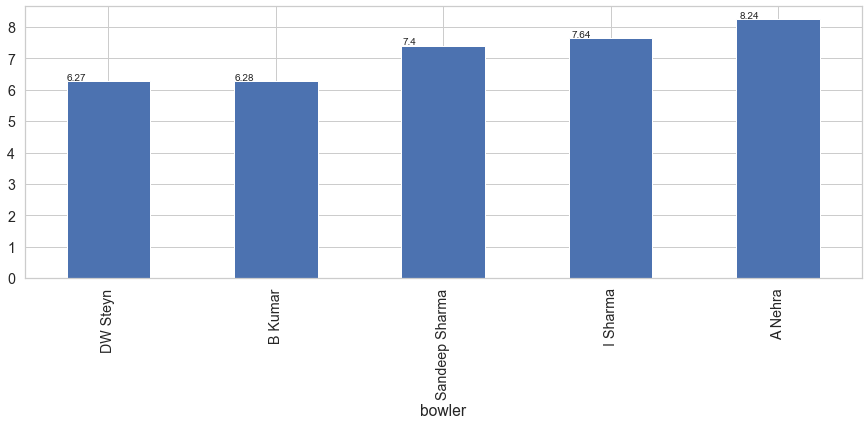

In [109]:
srh_bowlers = deliveries_season[(deliveries_season['bowling_team'] == 'SRH') & (deliveries_season['over'] <= 6)]
total_runs = srh_bowlers.groupby('bowler')['total_runs'].sum().to_frame()
overs_per_match = srh_bowlers[srh_bowlers['ball'] <= 6].groupby(['key_0', 'bowler'])['over'].nunique().to_frame()
total_overs = overs_per_match.groupby('bowler').sum()
# bowler bowled atleat 20 overs
total_overs = total_overs[total_overs['over'] >= 20]
economic_rate = total_runs['total_runs'] / total_overs['over']
economic_rate.sort_values(ascending = True).head(5)
ax = economic_rate.sort_values(ascending = True).round(2).head(5).plot(kind="bar", figsize=(15,5))
for p in ax.patches:
     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

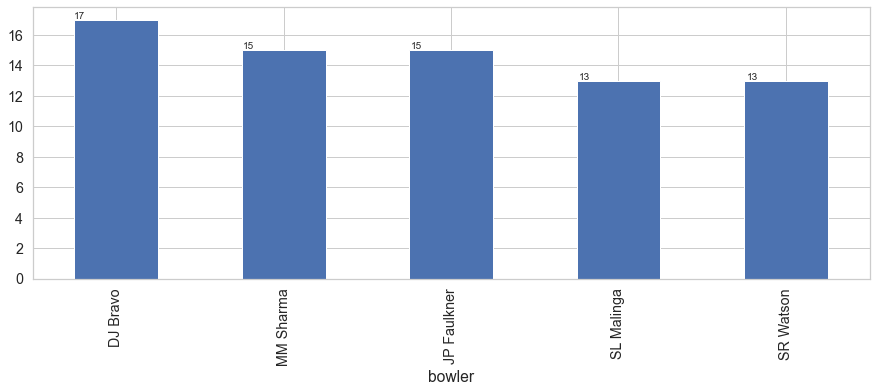

In [110]:
srh_wickets = deliveries_season[(deliveries_season['batting_team'] == 'SRH') & (deliveries_season['player_dismissed'].notnull())].groupby(deliveries_season['bowler'])['player_dismissed'].count()
ax = srh_wickets.sort_values(ascending = False).head(5).plot(kind='bar', figsize=(15,5))
for p in ax.patches:
     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [112]:
deliveries[deliveries['batting_team'] == 'SRH'].groupby(['batsman', 'non_striker'])['total_runs'].sum().sort_values(ascending = False).to_frame()

total_runs
batsman        non_striker              
DA Warner      S Dhawan             1420
S Dhawan       DA Warner             937
KS Williamson  S Dhawan              464
S Dhawan       KS Williamson         463
DA Warner      MC Henriques          358
...                                  ...
Sandeep Sharma DJ Hooda                0
               YK Pathan               0
CJ Jordan      NV Ojha                 0
BB Samantray   PA Patel                0
KS Williamson  NV Ojha                 0

[404 rows x 1 columns]

<AxesSubplot:xlabel='batsman'>

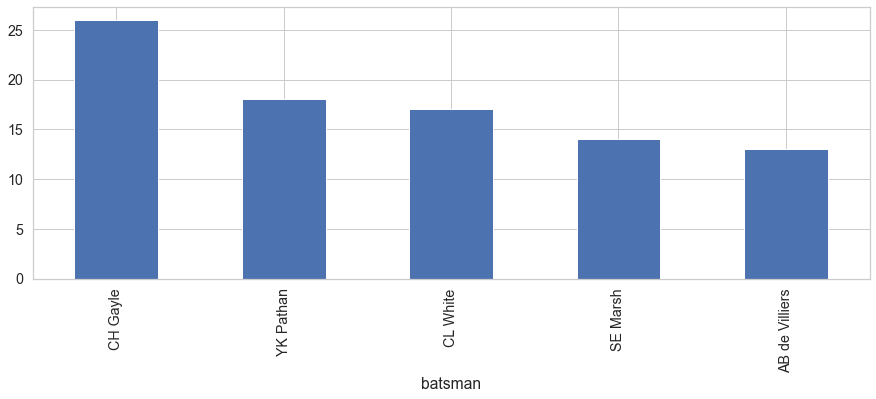

In [113]:
super_overs = deliveries[deliveries['is_super_over'] == 1].groupby('batsman')['total_runs'].sum().sort_values(ascending = False).head()
super_overs.plot(kind='bar', figsize=(15, 5))

<AxesSubplot:xlabel='bowler'>

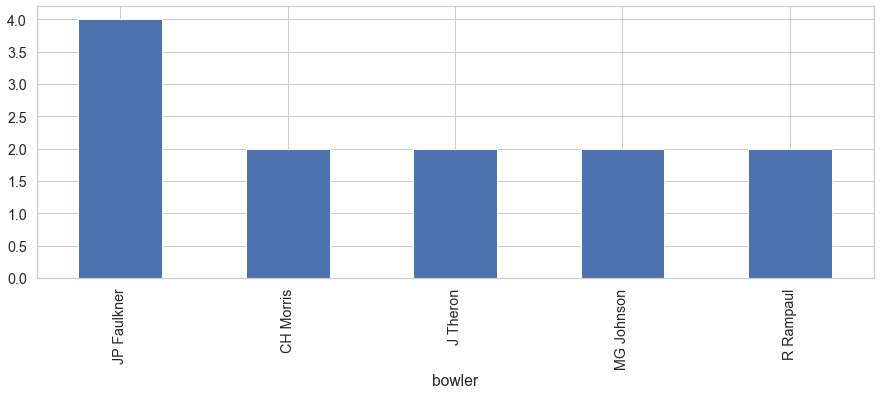

In [114]:
super_overs = deliveries[(deliveries['is_super_over'] == 1) & (deliveries['player_dismissed'].notnull())].groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head()
super_overs.plot(kind='bar', figsize=(15, 5))

<AxesSubplot:title={'center':'Player of the match'}>

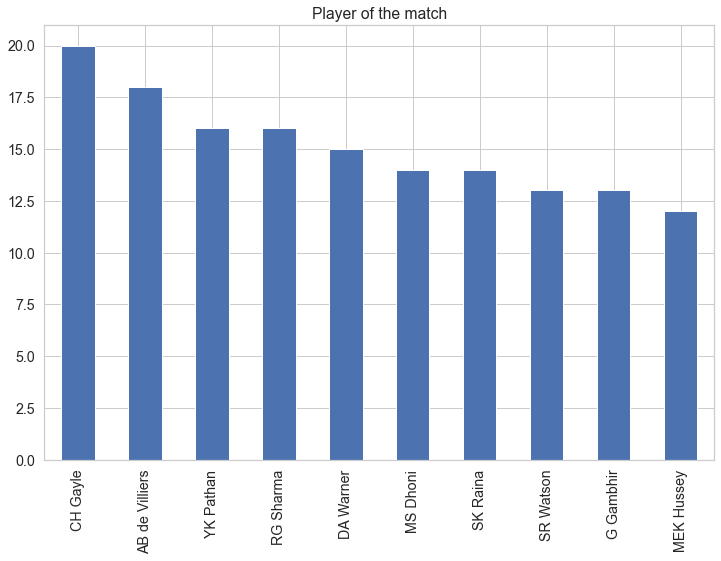

In [115]:
top_players = matches['player_of_match'].value_counts().head(10)
top_players.plot(kind='bar', title='Player of the match', figsize=(12,8))

In [117]:
orange_cap_players = deliveries_season.groupby(['season']).apply(lambda x: (x.groupby(['batsman']).sum().sort_values('batsman_runs', ascending=False)).head(1))
orange_cap_players['batsman_runs'].to_frame()

,,batsman_runs
season,batsman,
2008,SE Marsh,616
2009,ML Hayden,572
2010,SR Tendulkar,618
2011,CH Gayle,608
2012,CH Gayle,733
2013,MEK Hussey,733
2014,RV Uthappa,660
2015,DA Warner,562
2016,V Kohli,973


In [118]:
orange_cap_players = deliveries_season[deliveries_season['player_dismissed'].notnull()].groupby(['season']).apply(lambda x: (x.groupby(['bowler']).count().sort_values('player_dismissed', ascending=False)).head(1))
orange_cap_players['player_dismissed'].to_frame()

,,player_dismissed
season,bowler,
2008,Sohail Tanvir,24
2009,RP Singh,26
2010,PP Ojha,22
2011,SL Malinga,30
2012,M Morkel,30
2013,DJ Bravo,34
2014,MM Sharma,26
2015,DJ Bravo,28
2016,B Kumar,24


In [119]:
srh_matches[srh_matches['winner'] == 'SRH']['player_of_match'].value_counts().head(1)

DA Warner    10
Name: player_of_match, dtype: int64

<AxesSubplot:title={'center':'Top 10 players with most 4s'}, xlabel='batsman'>

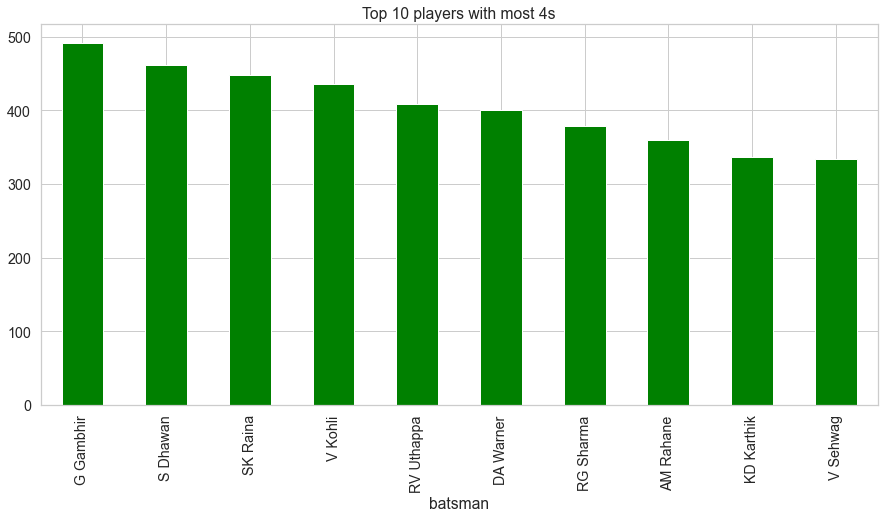

In [121]:
deliveries[deliveries['batsman_runs'] == 4].groupby('batsman')['batsman_runs'].count().sort_values(ascending = False).head(10).plot(kind='bar', title='Top 10 players with most 4s', figsize=(15,7), color='green')

<AxesSubplot:title={'center':'Top 10 Players with most 6s'}, xlabel='batsman'>

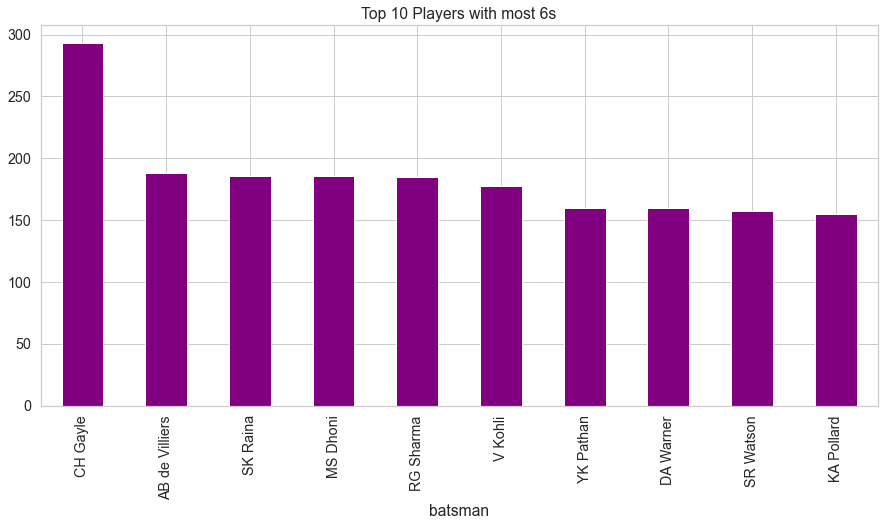

In [124]:
deliveries[deliveries['batsman_runs'] == 6].groupby('batsman')['batsman_runs'].count().sort_values(ascending = False).head(10).plot(kind='bar', title='Top 10 Players with most 6s', figsize=(15,7), color='purple')